In [16]:
from time import time
from datetime import datetime, timedelta
import pandas as pd
import numpy as np
from matplotlib import*
from matplotlib.cm import register_cmap
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, OrdinalEncoder, MinMaxScaler
from sklearn.compose import make_column_transformer, ColumnTransformer
from sklearn.pipeline import Pipeline
import pickle
import seaborn as sns
import copy

from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier #KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
#from keras.layers import Dropout

from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

from scipy import stats
import seaborn
from sklearn import set_config

## Red neurnal

from keras.layers import Dropout

import keras
from keras.layers import Dense
from keras.models import Sequential
from keras.models import model_from_json
from keras.models import load_model

from sklearn import set_config

print('Módulos importados')

Módulos importados


In [17]:
# Cargar el dataset con los nombres de las columnas
dataframe = pd.read_csv("/content/datados.csv", sep=",")

print(dataframe.shape)
dataframe.head()

(569, 33)


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [18]:
dataframe['diagnosis'] = dataframe['diagnosis'].map({'B': 0, 'M': 1})

In [19]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    int64  
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [20]:
dataframe.drop("Unnamed: 32", axis=1, inplace=True)

In [21]:
dataframe.drop('id',axis=1, inplace=True)

In [22]:
dataframe.describe()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,0.372583,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,0.483918,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,0.000000,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,0.000000,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,0.000000,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,1.000000,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,1.000000,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [23]:
#Se separa la variable de salida "Y" para poder realizar la preparación de datos a las variables independiente "X"
Y=dataframe['diagnosis']
dataframe=dataframe.drop(['diagnosis'], axis=1)
print(dataframe.shape)
dataframe.head()

(569, 30)


,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


<Axes: xlabel='diagnosis', ylabel='count'>

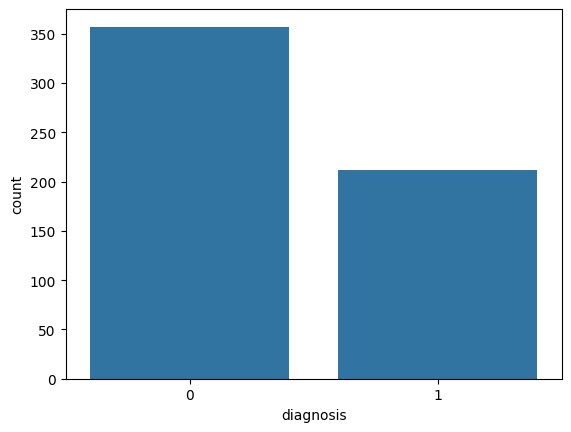

In [24]:
#Se genera una figura de frecuencia de clase, es decir, la cantidad de muestras en cada clase.
sns.countplot(x=Y)

In [41]:
# Clasificación de variables por categorías

numeric_features = [
    'radius_mean',             # Mean radius (mean of distances from center to points on the perimeter)
    'texture_mean',            # Mean texture (standard deviation of gray-scale values)
    'perimeter_mean',          # Mean perimeter
    'area_mean',               # Mean area
    'smoothness_mean',         # Mean smoothness (local variation in radius lengths)
    'compactness_mean',        # Mean compactness (perimeter^2 / area - 1.0)
    'concavity_mean',          # Mean concavity (severity of concave portions of the contour)
    'concave_points_mean',     # Mean concave points (number of concave portions of the contour)
    'symmetry_mean',           # Mean symmetry
    'fractal_dimension_mean',  # Mean fractal dimension ("coastline approximation" - 1)
    'radius_se',               # Standard error for radius
    'texture_se',              # Standard error for texture
    'perimeter_se',            # Standard error for perimeter
    'area_se',                 # Standard error for area
    'smoothness_se',           # Standard error for smoothness
    'compactness_se',          # Standard error for compactness
    'concavity_se',            # Standard error for concavity
    'concave_points_se',       # Standard error for concave points
    'symmetry_se',             # Standard error for symmetry
    'fractal_dimension_se',    # Standard error for fractal dimension
    'radius_worst',            # Worst radius
    'texture_worst',           # Worst texture
    'perimeter_worst',         # Worst perimeter
    'area_worst',              # Worst area
    'smoothness_worst',        # Worst smoothness
    'compactness_worst',       # Worst compactness
    'concavity_worst',         # Worst concavity
    'concave_points_worst',    # Worst concave points
    'symmetry_worst',          # Worst symmetry
    'fractal_dimension_worst'  # Worst fractal dimension
]

categorical_nominal_features = [
    # No categorical nominal features in the dataset
]

categorical_ordinal_features = [
    # No categorical ordinal features in the dataset
]


In [42]:
def analisisVariables(dataframe, categorical_ordinal_features, categorical_nominal_features):
    cantidadTotalVariables = len(dataframe.columns)
    print('Cantidad de variables antes de transformación de variables: ',cantidadTotalVariables)
    cantidadVariablesNominales = len(categorical_nominal_features)
    cantidadVariablesBinarias=0
    for variable in categorical_nominal_features:
        cantidadCategorias=dataframe[variable].nunique()
        cantidadVariablesBinarias=cantidadVariablesBinarias+cantidadCategorias
        print('Cantidad de categorías en la variable categórica nominal',variable,':',cantidadCategorias)
    print('Cantidad de variables binarias que reemplazarán a las variables categóricas nominales: ',cantidadVariablesBinarias)
    cantidadTotalVariablesConTransformacion = cantidadTotalVariables - cantidadVariablesNominales + cantidadVariablesBinarias
    return cantidadTotalVariablesConTransformacion

In [43]:
cantidadTotalVariablesConTransformacion=analisisVariables(dataframe, categorical_ordinal_features, categorical_nominal_features)
print('Cantidad de variables que habrá después de la transformación de variables: ',cantidadTotalVariablesConTransformacion)

Cantidad de variables antes de transformación de variables:  30
Cantidad de variables binarias que reemplazarán a las variables categóricas nominales:  0
Cantidad de variables que habrá después de la transformación de variables:  30


In [44]:
#Definición de transformadores (preprocesadores)

#1. Preprocesador de variables categóricas a numéricas (ordinales y nominales)
categorical_ordinal_transformer = Pipeline(steps=[
    ('ordinal', OrdinalEncoder())])
categorical_nominal_transformer_ConNombres = Pipeline(steps=[
    ('onehot', OneHotEncoder(sparse = False, handle_unknown = "ignore"))])# se ignorará una categoría desconocida
preprocesorCategoricoNumericoConNombres = ColumnTransformer(
    transformers=[
        ('catord', categorical_ordinal_transformer, categorical_ordinal_features),
        ('catnom', categorical_nominal_transformer_ConNombres, categorical_nominal_features)
    ],remainder='passthrough',n_jobs=-1)

#2. Normalización y Scaling: Preprocesador de variables numéricas con transformación MinMaxScaler
minmax_transformer = Pipeline(steps=[
    ('minmax', MinMaxScaler(feature_range=(0, 1)))])
preprocesorMinMax = ColumnTransformer(transformers =[
    ('tranminmax', minmax_transformer, list(range(cantidadTotalVariablesConTransformacion)))
], remainder ='passthrough')

#3. Estandarización: Preprocesador de variables numéricas con transformación StandardScaler
standardscaler_transformer = Pipeline(steps=[
    ('scaler', StandardScaler(with_mean=True,with_std=True))])
preprocesorStandardScaler = ColumnTransformer(transformers =[
    ('transcaler', standardscaler_transformer, list(range(cantidadTotalVariablesConTransformacion)))
], remainder ='passthrough')

#4. Preprocesador de variables numéricas con transformación SimpleImputer
simpleimputer_transformer = Pipeline(steps=[
    ('simpleimputer', SimpleImputer(strategy='median')) #otras: strategy='constant', strategy='most_frequent'
])
preprocesorSimpleImputer = ColumnTransformer(transformers =[
('transimpleimputer', simpleimputer_transformer, list(range(cantidadTotalVariablesConTransformacion)))
], remainder ='passthrough')

In [45]:
#Construcción de Pipeline con transformadores
pipe = Pipeline(steps=[
    ('prepcn', preprocesorCategoricoNumericoConNombres),
    ('prepstandard', preprocesorStandardScaler)
    #('prepminmax', preprocesorMinMax)
])

In [46]:
#Se ejecuta el pipeline
dataframeTransformado=copy.deepcopy(dataframe)
X_Transformado = pipe.fit_transform(dataframeTransformado)
print('********** Pipeline aplicado')
print('********** Transformador categórico nominal:')
print(pipe.named_steps['prepcn'].transformers_[1])
#Formación de dataframe transformado
cnamesDataset1=[]
if len(categorical_ordinal_features)!=0:
    cnamesDataset1.extend(categorical_ordinal_features)
if len(categorical_nominal_features)!=0:
    #nos ubicamos primeramente en el paso "prepcn"
    #luego, en el transformador "catnom" que está en [1] y luego en "onehot", por eso [1][1]
    cnamesDataset2 = pipe.named_steps['prepcn'].transformers_[1][1].named_steps['onehot'].get_feature_names_out(categorical_nominal_features)
    cnamesDataset1.extend(cnamesDataset2)
cnamesDataset3 = numeric_features
cnamesDataset1.extend(cnamesDataset3)
print('********** Cantidad de variables:', len(cnamesDataset1))
print('********** Lista de variables:')
print(cnamesDataset1)
dataframeTransformado = pd.DataFrame(data=X_Transformado,columns=cnamesDataset1)
#Guardar el dataset sin etiquetas como csv
dataframeTransformado.to_csv("DatasetTransformadoSinEtiquetas.csv", sep=";",index = False)
#Se agrega la variable de salida (etiquetas) al final
dataframeTransformado = pd.concat([dataframeTransformado, Y], axis = 1)
#Guardar el dataset con etiquetas como csv
dataframeTransformado.to_csv("DatasetTransformadoConEtiquetas.csv", sep=";",index = False)
dataframeTransformado.head()

/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()


********** Pipeline aplicado
********** Transformador categórico nominal:
('catnom', Pipeline(steps=[('onehot',
                 OneHotEncoder(handle_unknown='ignore', sparse=False))]), [])
********** Cantidad de variables: 30
********** Lista de variables:
['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave_points_mean', 'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave_points_se', 'symmetry_se', 'fractal_dimension_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave_points_worst', 'symmetry_worst', 'fractal_dimension_worst']


,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst,diagnosis
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,...,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015,1
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,...,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190,1
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,...,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391,1
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,...,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010,1
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,...,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100,1


In [47]:
dataframeTransformado.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst,diagnosis
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,...,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015,1
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,...,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190,1
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,...,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391,1
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,...,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010,1
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,...,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100,1


In [48]:
# Funciones para guardar y cargar un Pipeline o Modelo
def guardarPipeline(pipeline,nombreArchivo):
    with open(nombreArchivo+'.pickle', 'wb') as handle:
        pickle.dump(pipeline, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [49]:
guardarPipeline(pipe,'pipePreprocesadores')

In [50]:
def cargarPipeline(nombreArchivo):
    with open(nombreArchivo+'.pickle', 'rb') as handle:
        pipeline = pickle.load(handle)
    return pipeline

In [51]:
nombreArchivoPreprocesador='pipePreprocesadores'
pipe=None
pipe=cargarPipeline(nombreArchivoPreprocesador) #Debes incluir el archivo del Pipeline en el mismo directorio del script
cantidadPasos=len(pipe.steps)
print("Cantidad de pasos: ",cantidadPasos)
set_config(display='diagram')
pipe

Cantidad de pasos:  2


Pipeline(steps=[('prepcn',
                 ColumnTransformer(n_jobs=-1, remainder='passthrough',
                                   transformers=[('catord',
                                                  Pipeline(steps=[('ordinal',
                                                                   OrdinalEncoder())]),
                                                  []),
                                                 ('catnom',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  [])])),
                ('prepstandard',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('transcaler',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                   10, 11, 12, 13, 14, 15, 16,
                                                   17, 18, 19, 20, 21, 22, 23,
                                                   24, 25, 26, 27, 28,
                                                   29])]))])

In [52]:
#Funciones para guardar y cargar la Red Neuronal (Arquitectura y Pesos)
def guardarNN(model,nombreArchivo):
    print("Guardando Red Neuronal en Archivo")
    model.save(nombreArchivo+'.h5')
    print("Red Neuronal Grabada en Archivo")

def cargarNN(nombreArchivo):
    model = load_model(nombreArchivo+'.h5')
    print("Red Neuronal Cargada desde Archivo")
    return model

In [53]:
#Se identifica la cantidad de variables para crear la capa de entrada de la red neuronal
nombrePrep='prepstandard'#prepcn, prepminmax, prepstandard
cantidadVariablesIndependientes = len(pipe.named_steps[nombrePrep].transformers_[0][2])
print("\nCantidad de variables después de preprocesamiento: ",cantidadVariablesIndependientes)


Cantidad de variables después de preprocesamiento:  30


In [54]:
model = Sequential()
model.add(Dense(15, input_shape=(cantidadVariablesIndependientes,), activation='relu'))  # relu
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['acc'])
pipe.steps.append(['modelNN',model])
print("Cantidad de pasos: ",len(pipe.steps))
# Mostrar el resumen de la arquitectura de la red neuronal
model.summary()

Cantidad de pasos:  3
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 15)                465       
                                                                 
 dense_3 (Dense)             (None, 1)                 16        
                                                                 
Total params: 481 (1.88 KB)
Trainable params: 481 (1.88 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [68]:
# Dividir los datos en conjuntos de entrenamiento y prueba
X = copy.deepcopy(dataframe)
X_train, X_test, y_train, y_test = train_test_split(X, Yval, test_size=0.2, random_state=0)

# Definir la arquitectura del modelo
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))  # Ajustar el tamaño de la capa de salida y la función de activación según tu problema

# Compilar el modelo
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Entrenar el modelo
history = model.fit(X_train, y_train, epochs=100, batch_size=100, verbose=1)

# Evaluación en datos de entrenamiento
train_loss, train_acc = model.evaluate(X_train, y_train, verbose=0)
print('Resultado en Train:')
print("Accuracy: %.2f%%" % (train_acc * 100))

# Evaluación en datos de prueba
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
print('Resultado en Test:')
print("Accuracy: %.2f%%" % (test_acc * 100))

print('Modelo base entrenado')

Epoch 1/200
5/5 [==============================] - 1s 7ms/step - loss: 97.5940 - accuracy: 0.6374
Epoch 2/200
5/5 [==============================] - 0s 7ms/step - loss: 34.2953 - accuracy: 0.6374
Epoch 3/200
5/5 [==============================] - 0s 7ms/step - loss: 14.8047 - accuracy: 0.3560
Epoch 4/200
5/5 [==============================] - 0s 6ms/step - loss: 22.4074 - accuracy: 0.3626
Epoch 5/200
5/5 [==============================] - 0s 9ms/step - loss: 9.2124 - accuracy: 0.3956
Epoch 6/200
5/5 [==============================] - 0s 11ms/step - loss: 8.4738 - accuracy: 0.6374
Epoch 7/200
5/5 [==============================] - 0s 8ms/step - loss: 3.6606 - accuracy: 0.5890
Epoch 8/200
5/5 [==============================] - 0s 9ms/step - loss: 3.8156 - accuracy: 0.4462
Epoch 9/200
5/5 [==============================] - 0s 11ms/step - loss: 1.9499 - accuracy: 0.7275
Epoch 10/200
5/5 [==============================] - 0s 10ms/step - loss: 1.0677 - accuracy: 0.7648
Epoch 11/200
5/5 [====

In [69]:
guardarNN(model,'modeloRedNeuronalBase')
print('Modelo Base Guardado')

Guardando Red Neuronal en Archivo
Red Neuronal Grabada en Archivo
Modelo Base Guardado


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


<Axes: ylabel='count'>

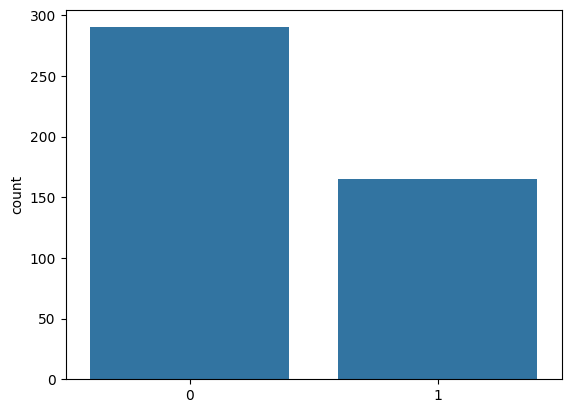

In [70]:
sns.countplot(x=y_train)

dict_keys(['loss', 'accuracy'])


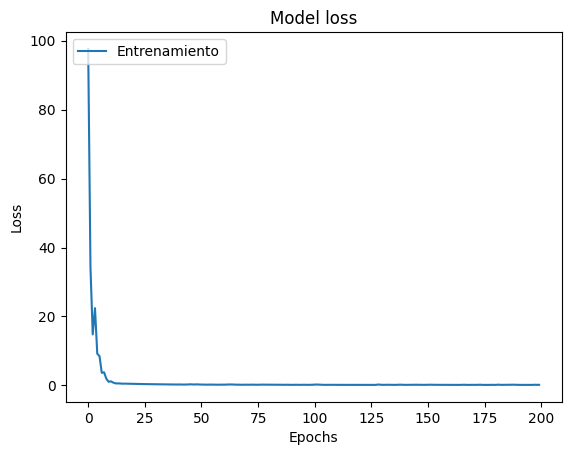

In [71]:
#Visualización de accuracy
import matplotlib.pyplot as plt
print(history.history.keys())
plt.plot(history.history['loss'])
#plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['Entrenamiento'], loc='upper left')
#plt.legend(['Entrenamiento', 'Validación'], loc='upper left')
plt.show()

In [72]:
# Hacer predicciones
y_pred = (model.predict(X_test) > 0.5).astype("int32")
y_pred = y_pred.flatten()  # de 2D a 1D
print('Predicciones:', y_pred)

4/4 [==============================] - 0s 3ms/step
Predicciones: [1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 1 0 0 0 0 0 0 0 0 1 0 1 0 1 0 1 0
 1 0 1 0 0 1 0 0 1 0 0 0 1 1 0 1 0 0 0 0 0 0 1 0 1 0 0 1 0 1 1 1 0 0 1 0 0
 1 0 0 0 0 0 1 1 1 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 1 0 0 0 0
 1 1 0]


In [73]:
dataframeFinal=pd.DataFrame({'real':y_test, 'predicción': y_pred})

np.set_printoptions(formatter={'float': lambda X: "{0:0.0f}".format(X)})

dataframeFinal.head(20)

,real,predicción
0,1,1
1,0,0
2,0,0
3,0,0
4,0,0
5,0,0
6,0,0
7,0,0
8,0,0
9,0,0


In [74]:
MAE=metrics.mean_absolute_error(y_test, y_pred)
MSE=metrics.mean_squared_error(y_test, y_pred)
RMSE=np.sqrt(metrics.mean_squared_error(y_test, y_pred))
accuracy=str(accuracy_score(y_test, y_pred))

MAE=str(round(MAE, 4))
MSE=str(round(MSE, 4))
RMSE=str(round(RMSE, 4))

print('Mean Absolute Error (MAE):', MAE)
print('Mean Squared Error (MSE):', MSE)
print('Root Mean Squared Error (RMSE):', RMSE)
print('Accuracy: ' + accuracy)

print('Confusion_matrix:')
y_test_transformado = y_test
y_pred_transformado = y_pred

cm = confusion_matrix(y_test_transformado, y_pred_transformado)
print(cm)
tn, fp, fn, tp = confusion_matrix(y_test_transformado, y_pred_transformado).ravel()
print(tn,fp,fn,tp)

precision=precision_score(y_test_transformado, y_pred_transformado)
precision=str(round(precision, 4))
print('Precision:',precision)

recall=recall_score(y_test_transformado, y_pred_transformado)
recall=str(round(recall, 4))
print('Recall:',recall)

f1=f1_score(y_test_transformado, y_pred_transformado)
f1=str(round(f1, 4))
print('F1:',f1)

Mean Absolute Error (MAE): 0.114
Mean Squared Error (MSE): 0.114
Root Mean Squared Error (RMSE): 0.3377
Accuracy: 0.8859649122807017
Confusion_matrix:
[[67  0]
 [13 34]]
67 0 13 34
Precision: 1.0
Recall: 0.7234
F1: 0.8395


#Balanceo

In [75]:
dataframeBalanceoRN=pd.read_csv("/content/DatasetTransformadoConEtiquetas.csv", sep=";")
print(dataframeBalanceoRN.shape)
dataframeBalanceoRN.head()

(569, 31)


,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst,diagnosis
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,...,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015,1
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,...,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190,1
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,...,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391,1
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,...,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010,1
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,...,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100,1


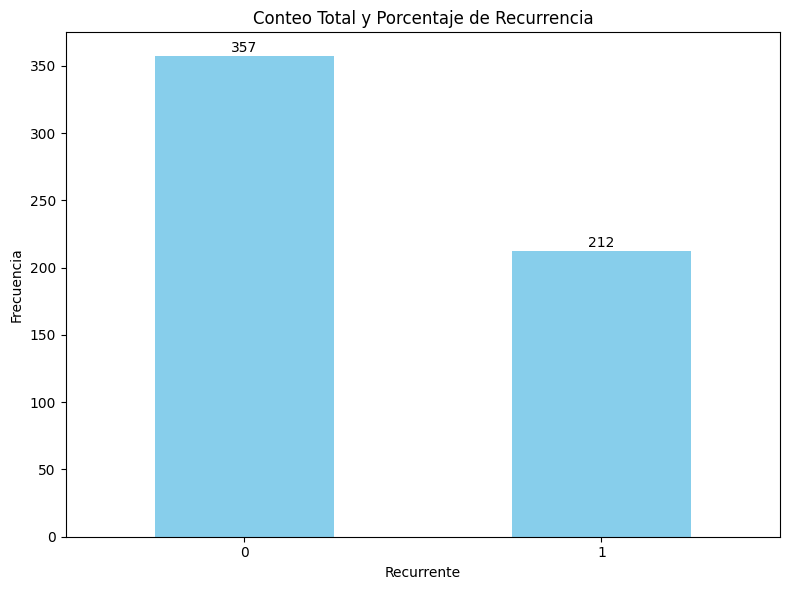


Porcentaje de cada categoría:
diagnosis
0    62.741652
1    37.258348
Name: count, dtype: float64


In [76]:
# Calcular la frecuencia de la columna 'Recurrente'
frecuencia_recurrente = dataframeBalanceoRN['diagnosis'].value_counts()

# Calcular el porcentaje de cada categoría
porcentaje_recurrente = frecuencia_recurrente / len(dataframeBalanceoRN) * 100

# Crear el gráfico de barras
plt.figure(figsize=(8, 6))  # Tamaño del gráfico opcional
frecuencia_recurrente.plot(kind='bar', color='skyblue')

# Mostrar el conteo total sobre cada barra
for index, value in enumerate(frecuencia_recurrente):
    plt.text(index, value + 1, f'{value}', ha='center', va='bottom')

# Personalización del gráfico
plt.title('Conteo Total y Porcentaje de Recurrencia')  # Título del gráfico
plt.xlabel('Recurrente')  # Etiqueta del eje x
plt.ylabel('Frecuencia')  # Etiqueta del eje y
plt.xticks(rotation=0)  # Rotación de etiquetas x (opcional)

# Mostrar el gráfico
plt.tight_layout()  # Ajuste de diseño
plt.show()

# Mostrar el porcentaje de cada categoría
print("\nPorcentaje de cada categoría:")
print(porcentaje_recurrente)

Número de datos originales en clase 0: 357
Número de datos originales en clase 1: 212
Número de datos después del balanceo en clase 0: 357
Número de datos después del balanceo en clase 1: 357


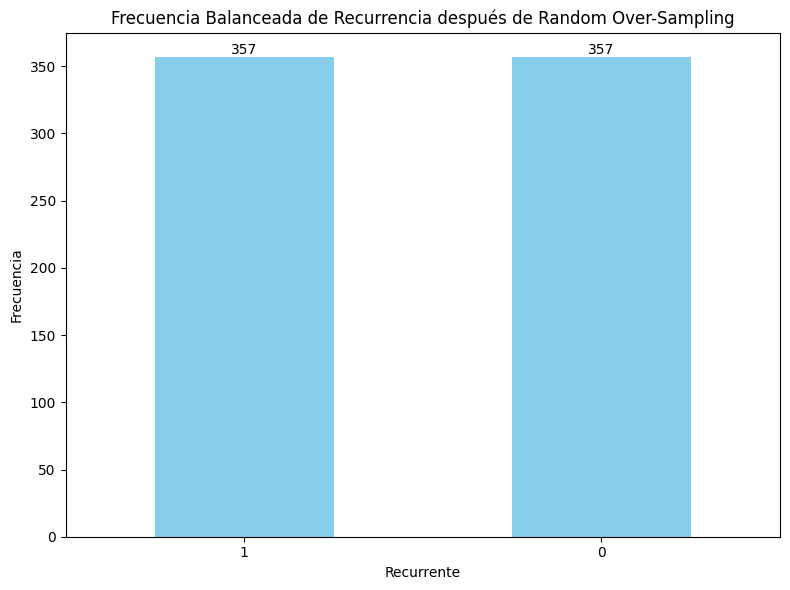

   radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
0     1.097064     -2.073335        1.269934   0.984375         1.568466   
1     1.829821     -0.353632        1.685955   1.908708        -0.826962   
2     1.579888      0.456187        1.566503   1.558884         0.942210   
3    -0.768909      0.253732       -0.592687  -0.764464         3.283553   
4     1.750297     -1.151816        1.776573   1.826229         0.280372   

   compactness_mean  concavity_mean  concave_points_mean  symmetry_mean  \
0          3.283515        2.652874             2.532475       2.217515   
1         -0.487072       -0.023846             0.548144       0.001392   
2          1.052926        1.363478             2.037231       0.939685   
3          3.402909        1.915897             1.451707       2.867383   
4          0.539340        1.371011             1.428493      -0.009560   

   fractal_dimension_mean  ...  texture_worst  perimeter_worst  area_worst  \
0             

In [77]:
from imblearn.over_sampling import RandomOverSampler
import pandas as pd
import matplotlib.pyplot as plt

# Separar características y etiquetas
X = dataframeBalanceoRN.drop('diagnosis', axis=1)
y = dataframeBalanceoRN['diagnosis']

# Mostrar conteo original
print("Número de datos originales en clase 0:", y.value_counts()[0])
print("Número de datos originales en clase 1:", y.value_counts()[1])

# Aplicar Random Over-Sampling
ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X, y)

# Verificar la cantidad de datos después del balanceo
print("Número de datos después del balanceo en clase 0:", y_resampled.value_counts()[0])
print("Número de datos después del balanceo en clase 1:", y_resampled.value_counts()[1])

# Convertir los datos balanceados en un DataFrame
dataframe_balanceado = pd.DataFrame(X_resampled, columns=X.columns)
dataframe_balanceado['diagnosis'] = y_resampled

# Guardar el dataframe balanceado en un archivo CSV
dataframe_balanceado.to_csv("dataframeBalanceoRN_OverSampled.csv", sep=";", index=False)

# Calcular la frecuencia de la columna 'diagnostic' después de aplicar Random Over-Sampling
frecuencia_balanceada = dataframe_balanceado['diagnosis'].value_counts()

# Crear el gráfico de barras
plt.figure(figsize=(8, 6))
bars = frecuencia_balanceada.plot(kind='bar', color='skyblue')

# Mostrar el count sobre cada barra
for bar in bars.patches:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.1, round(yval, 2), ha='center', va='bottom')

# Personalización del gráfico
plt.title('Frecuencia Balanceada de Recurrencia después de Random Over-Sampling')
plt.xlabel('Recurrente')
plt.ylabel('Frecuencia')
plt.xticks(rotation=0)

# Mostrar el gráfico
plt.tight_layout()
plt.show()

# Mostrar las primeras filas del dataframe balanceado
print(dataframe_balanceado.head())


In [78]:
# Crear DataFrame con las características y las etiquetas balanceadas
dataframe_balanceado = pd.concat([X_resampled, y_resampled], axis=1)

# Mostrar el DataFrame balanceado
print("DataFrame Balanceado después del balanceo:")
print(dataframe_balanceado.shape)
dataframe_balanceado.head()

DataFrame Balanceado después del balanceo:
(714, 31)


,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst,diagnosis
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,...,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015,1
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,...,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190,1
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,...,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391,1
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,...,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010,1
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,...,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100,1


In [79]:
Y = dataframe_balanceado['diagnosis']
dataframe_balanceado=dataframe_balanceado.drop(['diagnosis'], axis=1)
X_Balanceado=dataframe_balanceado.values
X_Balanceado

array([[1, -2, 1, ..., 2, 3, 2],
       [2, -0, 2, ..., 1, -0, 0],
       [2, 0, 2, ..., 2, 1, 0],
       ...,
       [1, 0, 1, ..., 1, 1, -0],
       [-0, 1, -0, ..., 1, 0, 1],
       [1, 0, 1, ..., 1, 0, 0]])

#pipe

In [80]:
# Separar los transformadores del modelo
transformers_pipe = Pipeline(pipe.steps[:-1])

#Se identifica la cantidad de variables para crear la capa de entrada de la red neuronal
nombrePrep='prepstandard'#prepcn, prepminmax, prepstandard
cantidadVariablesIndependientes = len(pipe.named_steps[nombrePrep].transformers_[0][2])
print("\nCantidad de variables después de preprocesamiento: ",cantidadVariablesIndependientes)


Cantidad de variables después de preprocesamiento:  30


In [81]:
dataframe_balanceado.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,...,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,...,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,...,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,...,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,...,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100


In [82]:
model = Sequential()
model.add(Dense(15, input_shape=(cantidadVariablesIndependientes,), activation='relu'))  # relu
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['acc'])
pipe.steps.append(['modelNN',model])
print("Cantidad de pasos: ",len(pipe.steps))
# Mostrar el resumen de la arquitectura de la red neuronal
model.summary()

Cantidad de pasos:  4
Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_19 (Dense)            (None, 15)                465       
                                                                 
 dense_20 (Dense)            (None, 1)                 16        
                                                                 
Total params: 481 (1.88 KB)
Trainable params: 481 (1.88 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [83]:
# Entrenamiento del modelo
Yval = Y.values
X = copy.deepcopy(dataframe_balanceado)
X_train, X_test, y_train, y_test = train_test_split(X, Yval, test_size=0.2)  # random_state = 0

# Entrenar el modelo Keras con verbose=1 para imprimir información en cada época
history = model.fit(X_train, y_train, epochs=200, batch_size=1000, verbose=1)  # validation_split=0.1

# Evaluación en datos de entrenamiento
train_loss, train_acc = model.evaluate(X_train, y_train, verbose=0)
print('Resultado en Train:')
print("Accuracy: %.2f%%" % (train_acc * 100))

# Evaluación en datos de prueba
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
print('Resultado en Test:')
print("Accuracy: %.2f%%" % (test_acc * 100))

print('Modelo base entrenado')

Epoch 1/200
1/1 [==============================] - 1s 619ms/step - loss: 0.6645 - acc: 0.5972
Epoch 2/200
1/1 [==============================] - 0s 9ms/step - loss: 0.6186 - acc: 0.6322
Epoch 3/200
1/1 [==============================] - 0s 10ms/step - loss: 0.5889 - acc: 0.6602
Epoch 4/200
1/1 [==============================] - 0s 12ms/step - loss: 0.5660 - acc: 0.6795
Epoch 5/200
1/1 [==============================] - 0s 10ms/step - loss: 0.5469 - acc: 0.6988
Epoch 6/200
1/1 [==============================] - 0s 11ms/step - loss: 0.5303 - acc: 0.7250
Epoch 7/200
1/1 [==============================] - 0s 11ms/step - loss: 0.5154 - acc: 0.7443
Epoch 8/200
1/1 [==============================] - 0s 13ms/step - loss: 0.5020 - acc: 0.7566
Epoch 9/200
1/1 [==============================] - 0s 13ms/step - loss: 0.4897 - acc: 0.7776
Epoch 10/200
1/1 [==============================] - 0s 11ms/step - loss: 0.4782 - acc: 0.7933
Epoch 11/200
1/1 [==============================] - 0s 13ms/step - lo

In [84]:
guardarNN(model,'modeloRedNeuronalBalanceado')
print('Modelo Base Guardado')

Guardando Red Neuronal en Archivo
Red Neuronal Grabada en Archivo
Modelo Base Guardado


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


<Axes: ylabel='count'>

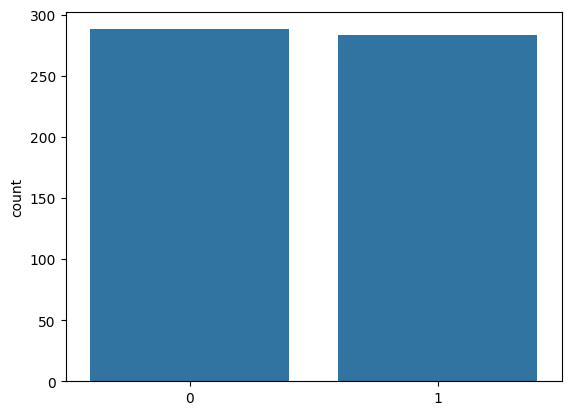

In [85]:
sns.countplot(x=y_train)

dict_keys(['loss', 'acc'])


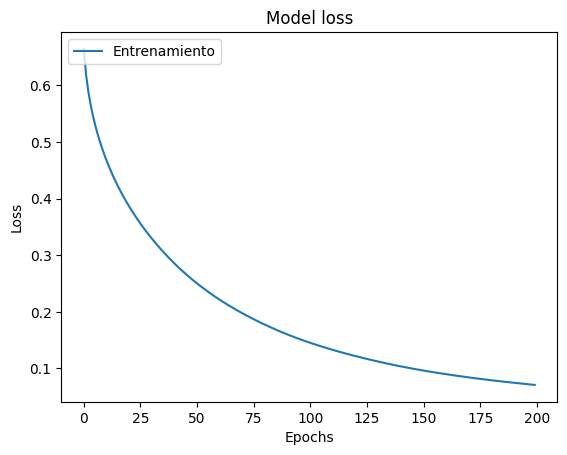

In [86]:
#Visualización de accuracy
import matplotlib.pyplot as plt
print(history.history.keys())
plt.plot(history.history['loss'])
#plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['Entrenamiento'], loc='upper left')
#plt.legend(['Entrenamiento', 'Validación'], loc='upper left')
plt.show()

In [87]:
# Hacer predicciones
y_pred = (model.predict(X_test) > 0.5).astype("int32")
y_pred = y_pred.flatten()  # de 2D a 1D
print('Predicciones:', y_pred)

5/5 [==============================] - 0s 3ms/step
Predicciones: [0 0 1 0 0 0 1 1 0 1 0 0 0 0 1 1 1 1 1 1 0 0 1 0 1 0 1 0 1 1 1 1 1 1 1 1 1
 1 1 0 1 1 0 0 1 0 1 1 0 1 1 0 1 1 0 1 0 1 0 0 1 0 1 0 0 0 1 1 0 1 0 0 1 1
 1 1 1 0 0 0 0 0 1 1 1 1 0 0 1 1 0 1 1 0 1 1 1 0 0 0 0 0 0 0 0 0 1 1 0 1 0
 1 1 1 0 1 0 0 0 1 0 0 0 0 0 1 0 1 1 0 1 0 0 1 0 0 1 1 0 0 1 1 1]


In [88]:
dataframeFinal=pd.DataFrame({'real':y_test, 'predicción': y_pred})

np.set_printoptions(formatter={'float': lambda X: "{0:0.0f}".format(X)})

dataframeFinal.head(20)

,real,predicción
0,0,0
1,0,0
2,1,1
3,0,0
4,0,0
5,0,0
6,1,1
7,1,1
8,0,0
9,1,1


In [101]:
MAE=metrics.mean_absolute_error(y_test, y_pred)
MSE=metrics.mean_squared_error(y_test, y_pred)
RMSE=np.sqrt(metrics.mean_squared_error(y_test, y_pred))
accuracy=str(accuracy_score(y_test, y_pred))

MAE=str(round(MAE, 4))
MSE=str(round(MSE, 4))
RMSE=str(round(RMSE, 4))

print('Mean Absolute Error (MAE):', MAE)
print('Mean Squared Error (MSE):', MSE)
print('Root Mean Squared Error (RMSE):', RMSE)
print('Accuracy: ' + accuracy)

print('Confusion_matrix:')
y_test_transformado = y_test
y_pred_transformado = y_pred

cm = confusion_matrix(y_test_transformado, y_pred_transformado)
print(cm)
tn, fp, fn, tp = confusion_matrix(y_test_transformado, y_pred_transformado).ravel()
print(tn,fp,fn,tp)

precision=precision_score(y_test_transformado, y_pred_transformado)
precision=str(round(precision, 4))
print('Precision:',precision)

recall=recall_score(y_test_transformado, y_pred_transformado)
recall=str(round(recall, 4))
print('Recall:',recall)

f1=f1_score(y_test_transformado, y_pred_transformado)
f1=str(round(f1, 4))
print('F1:',f1)

Mean Absolute Error (MAE): 0.014
Mean Squared Error (MSE): 0.014
Root Mean Squared Error (RMSE): 0.1183
Accuracy: 0.986013986013986
Confusion_matrix:
[[68  1]
 [ 1 73]]
68 1 1 73
Precision: 0.9865
Recall: 0.9865
F1: 0.9865


#samples

In [105]:
#Esta es la función para calcular la certeza (confianza o probabilidad) asociada a la predicción de clase
def obtenerResultadosyCertezas(lista):
    predicciones=lista
    marcas=[]
    certezas=[]
    nuevomax=1
    nuevomin=0
    marca=-1
    certeza=-1
    for i in range(len(lista)):
        prediccion=lista[i]
        if (prediccion < 0.5):
            marca = 'No Otorgado'
            maxa=0.5
            mina=0
            certeza=1-((prediccion-mina)/(maxa-mina)*(nuevomax-nuevomin)+nuevomin)
            certeza=str(int((certeza)*100))+'%'
        elif (prediccion >= 0.5):
            marca = 'Otorgado'
            maxa=1
            mina=0.5
            certeza=(prediccion-mina)/(maxa-mina)*(nuevomax-nuevomin)+nuevomin
            certeza=str(int((certeza)*100))+'%'
        marcas.append(marca)
        certezas.append(certeza)
    return prediccion, marcas, certezas

In [106]:
import pandas as pd
import numpy as np

def predecirNuevoCliente(id, diagnosis, radius_mean, texture_mean, perimeter_mean, area_mean, smoothness_mean,
                          compactness_mean, concavity_mean, concave_points_mean, symmetry_mean, fractal_dimension_mean,
                          radius_se, texture_se, perimeter_se, area_se, smoothness_se, compactness_se, concavity_se,
                          concave_points_se, symmetry_se, fractal_dimension_se, radius_worst, texture_worst,
                          perimeter_worst, area_worst, smoothness_worst, compactness_worst, concavity_worst,
                          concave_points_worst, symmetry_worst, fractal_dimension_worst):
    # Actualizar la lista de nombres de características
    cnames = ['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean',
              'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
              'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se',
              'concavity_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se', 'radius_worst',
              'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst',
              'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst']

    # Actualizar la lista de datos
    Xnew = [id, diagnosis, radius_mean, texture_mean, perimeter_mean, area_mean, smoothness_mean, compactness_mean,
            concavity_mean, concave_points_mean, symmetry_mean, fractal_dimension_mean, radius_se, texture_se,
            perimeter_se, area_se, smoothness_se, compactness_se, concavity_se, concave_points_se, symmetry_se,
            fractal_dimension_se, radius_worst, texture_worst, perimeter_worst, area_worst, smoothness_worst,
            compactness_worst, concavity_worst, concave_points_worst, symmetry_worst, fractal_dimension_worst]

    # Crear el DataFrame con los nuevos datos
    Xnew_Dataframe = pd.DataFrame(data=[Xnew], columns=cnames)

    # Realizar la predicción
    y_pred = pipe.predict(Xnew_Dataframe)[0].tolist()
    print(y_pred[0])

    # Realizar el análisis de las predicciones
    predicciones, marcas, certezas = obtenerResultadosyCertezas(y_pred)

    # Crear el DataFrame final
    dataframeFinal = pd.DataFrame({'Predicción': predicciones, 'Resultado': marcas, 'Certeza': certezas})
    np.set_printoptions(formatter={'float': lambda X: "{0:0.0f}".format(X)})
    return dataframeFinal

# Se carga el Pipeline de Preprocesamiento
pipe = cargarPipeline(nombreArchivoPreprocesador)
print('Pipeline de Preprocesamiento Cargado')

# Se carga la Red Neuronal
modeloOptimizado = cargarNN('modeloRedNeuronalBase')

# Se integra la Red Neuronal al final del Pipeline
pipe.steps.append(['modelNN', modeloOptimizado])
print('Red Neuronal integrada al Pipeline')


Pipeline de Preprocesamiento Cargado
Red Neuronal Cargada desde Archivo
Red Neuronal integrada al Pipeline


In [104]:
# Datos del cliente
id = 1
diagnosis = 'M'  # 'M' para maligno, 'B' para benigno
radius_mean = 12.34
texture_mean = 24.56
perimeter_mean = 78.90
area_mean = 456.78
smoothness_mean = 0.098
compactness_mean = 0.045
concavity_mean = 0.027
concave_points_mean = 0.011
symmetry_mean = 0.183
fractal_dimension_mean = 0.065
radius_se = 1.23
texture_se = 2.34
perimeter_se = 3.45
area_se = 4.56
smoothness_se = 0.012
compactness_se = 0.015
concavity_se = 0.007
concave_points_se = 0.002
symmetry_se = 0.040
fractal_dimension_se = 0.005
radius_worst = 14.56
texture_worst = 30.12
perimeter_worst = 90.34
area_worst = 500.12
smoothness_worst = 0.110
compactness_worst = 0.060
concavity_worst = 0.035
concave_points_worst = 0.015
symmetry_worst = 0.200
fractal_dimension_worst = 0.075

# Predicción del cliente
print('Cliente1:')
dataframeFinal = predecirNuevoCliente(id, diagnosis, radius_mean, texture_mean, perimeter_mean, area_mean, smoothness_mean,
                                        compactness_mean, concavity_mean, concave_points_mean, symmetry_mean, fractal_dimension_mean,
                                        radius_se, texture_se, perimeter_se, area_se, smoothness_se, compactness_se, concavity_se,
                                        concave_points_se, symmetry_se, fractal_dimension_se, radius_worst, texture_worst,
                                        perimeter_worst, area_worst, smoothness_worst, compactness_worst, concavity_worst,
                                        concave_points_worst, symmetry_worst, fractal_dimension_worst)
print(dataframeFinal.head())

Cliente1:
1/1 [==============================] - 0s 70ms/step
0.05582078918814659
   Predicción    Resultado Certeza
0    0.055821  No Otorgado     88%


In [107]:
# Datos del cliente
id = 2
diagnosis = 'B'  # 'M' para maligno, 'B' para benigno
radius_mean = 15.67
texture_mean = 21.34
perimeter_mean = 85.12
area_mean = 520.45
smoothness_mean = 0.090
compactness_mean = 0.050
concavity_mean = 0.035
concave_points_mean = 0.013
symmetry_mean = 0.175
fractal_dimension_mean = 0.070
radius_se = 1.50
texture_se = 2.20
perimeter_se = 3.60
area_se = 5.10
smoothness_se = 0.015
compactness_se = 0.020
concavity_se = 0.010
concave_points_se = 0.003
symmetry_se = 0.045
fractal_dimension_se = 0.006
radius_worst = 16.78
texture_worst = 33.45
perimeter_worst = 95.67
area_worst = 550.89
smoothness_worst = 0.120
compactness_worst = 0.070
concavity_worst = 0.040
concave_points_worst = 0.018
symmetry_worst = 0.210
fractal_dimension_worst = 0.080

# Predicción del cliente
print('Cliente2:')
dataframeFinal = predecirNuevoCliente(id, diagnosis, radius_mean, texture_mean, perimeter_mean, area_mean, smoothness_mean,
                                        compactness_mean, concavity_mean, concave_points_mean, symmetry_mean, fractal_dimension_mean,
                                        radius_se, texture_se, perimeter_se, area_se, smoothness_se, compactness_se, concavity_se,
                                        concave_points_se, symmetry_se, fractal_dimension_se, radius_worst, texture_worst,
                                        perimeter_worst, area_worst, smoothness_worst, compactness_worst, concavity_worst,
                                        concave_points_worst, symmetry_worst, fractal_dimension_worst)
print(dataframeFinal.head())


Cliente2:
1/1 [==============================] - 0s 108ms/step
0.08064620941877365
   Predicción    Resultado Certeza
0    0.080646  No Otorgado     83%
